In [29]:
codebert = RobertaModel.from_pretrained('microsoft/codebert-base',)
codebert.to('cuda')
train_emb_cb = []
from torch.utils.data import DataLoader
from transformers.data.data_collator import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(
    tokenizer=tokenizer, max_length=512, padding='max_length'
)

train_iter = iter(DataLoader(dataset=train_probe_dataset_no_trace, batch_size=8, collate_fn=data_collator))
for i in train_iter:
    pooler_output = codebert(i['input_ids'].to('cuda'))['pooler_output'].detach()
    train_emb_cb.extend(pooler_output)

/tmp/ipykernel_1811/3547245619.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return {'input_ids':torch.tensor(self.examples[i]), 'labels':torch.tensor(self.labels[i])}


In [2]:
import numpy as np

In [3]:
train_emb_cb = np.load('google_ex.npy', allow_pickle=True)[:,:1,:].squeeze()
train_emb = np.load('netty_ex.npy', allow_pickle=True)[:,:1,:].squeeze()
# train_emb_gcb = np.load('./embeddings/train_graphcodebert.npy', allow_pickle=True)

In [17]:
from MulticoreTSNE import MulticoreTSNE as TSNE
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(6, 6)

<Figure size 432x432 with 0 Axes>

In [26]:
#train_emb_cb= np.array(train_emb_cb)
tt=np.concatenate([[train_emb_cb[5] for i in range(222)], [train_emb[100] for i in range(222)]])
#tt=np.concatenate([train_emb_cb, train_emb])

In [6]:
tt.shape

(444, 512)

In [76]:
np.linspace(0, 1, len(tt))

array([0.00000000e+00, 4.39894953e-06, 8.79789906e-06, ...,
       9.99991202e-01, 9.99995601e-01, 1.00000000e+00])

In [77]:
np.concatenate((np.zeros(222), np.ones(222)))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1.

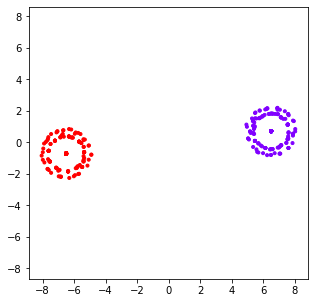

In [27]:
#colors = cm.rainbow(np.linspace(0, 1, len(tt)))
colors = cm.rainbow(np.concatenate((np.zeros(222), np.ones(222))))

embeddings_cb = TSNE(n_jobs=16).fit_transform(tt)

# equivalent_points = np.array(embeddings_cb)[test_embedding_indexs]
# center =equivalent_points.mean(axis=0)


vis_x_cb = embeddings_cb[:, 0]
vis_y_cb = embeddings_cb[:, 1]

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.scatter(vis_x_cb, vis_y_cb, color=colors, marker='.')
# cir = plt.Circle(center, width, color='r',fill=False)
ax.set_aspect('equal', adjustable='datalim')
# ax.add_patch(cir)
# plt.colorbar(ticks=range(10))
# plt.clim(-0.5, 9.5)
# plt.savefig('./embeddings/tsne_no_strand_codebert.pdf', bbox_inches='tight', dpi=300, format='pdf')
plt.show()


In [8]:
colors.shape

(444, 4)

In [66]:
# point_of_interest = [46,27]
# def find_idx(e):
#     return np.linalg.norm(point_of_interest-e)

# def get_idx(e):
#     return np.argsort(np.linalg.norm(point_of_interest-e, axis=1))

# # test_idx = get_idx(embeddings)

# points = 100
# test_embeddings = sorted(embeddings_cb, key=find_idx)
# test_points = np.array(test_embeddings)
# center = test_points[0:points].mean(axis=0)
# width = np.linalg.norm(point_of_interest-test_points[0:points][-1], axis=-1)
# test_embedding_indexs = get_idx(np.array(embeddings_cb))[:points]

In [48]:
train_emb= np.array(train_emb)

tt=np.stack([i.cpu().detach().numpy() for i in train_emb], axis=0)
colors = cm.rainbow(np.linspace(0, 1, len(tt)))
embeddings = TSNE(n_jobs=16).fit_transform(tt)

In [49]:
# def find_idx(e):
#     return np.linalg.norm([39,-41]-e)

# def get_idx(e):
#     return np.argsort(np.linalg.norm([39,-41]-e))
# # list1 to demonstrate the use of sorting 
# # using using second key 

  
# # sorts the array in ascending according to 
# # second element
# test = sorted(embeddings_cb, key=find_idx)

# # test_idx = get_idx(embeddings)

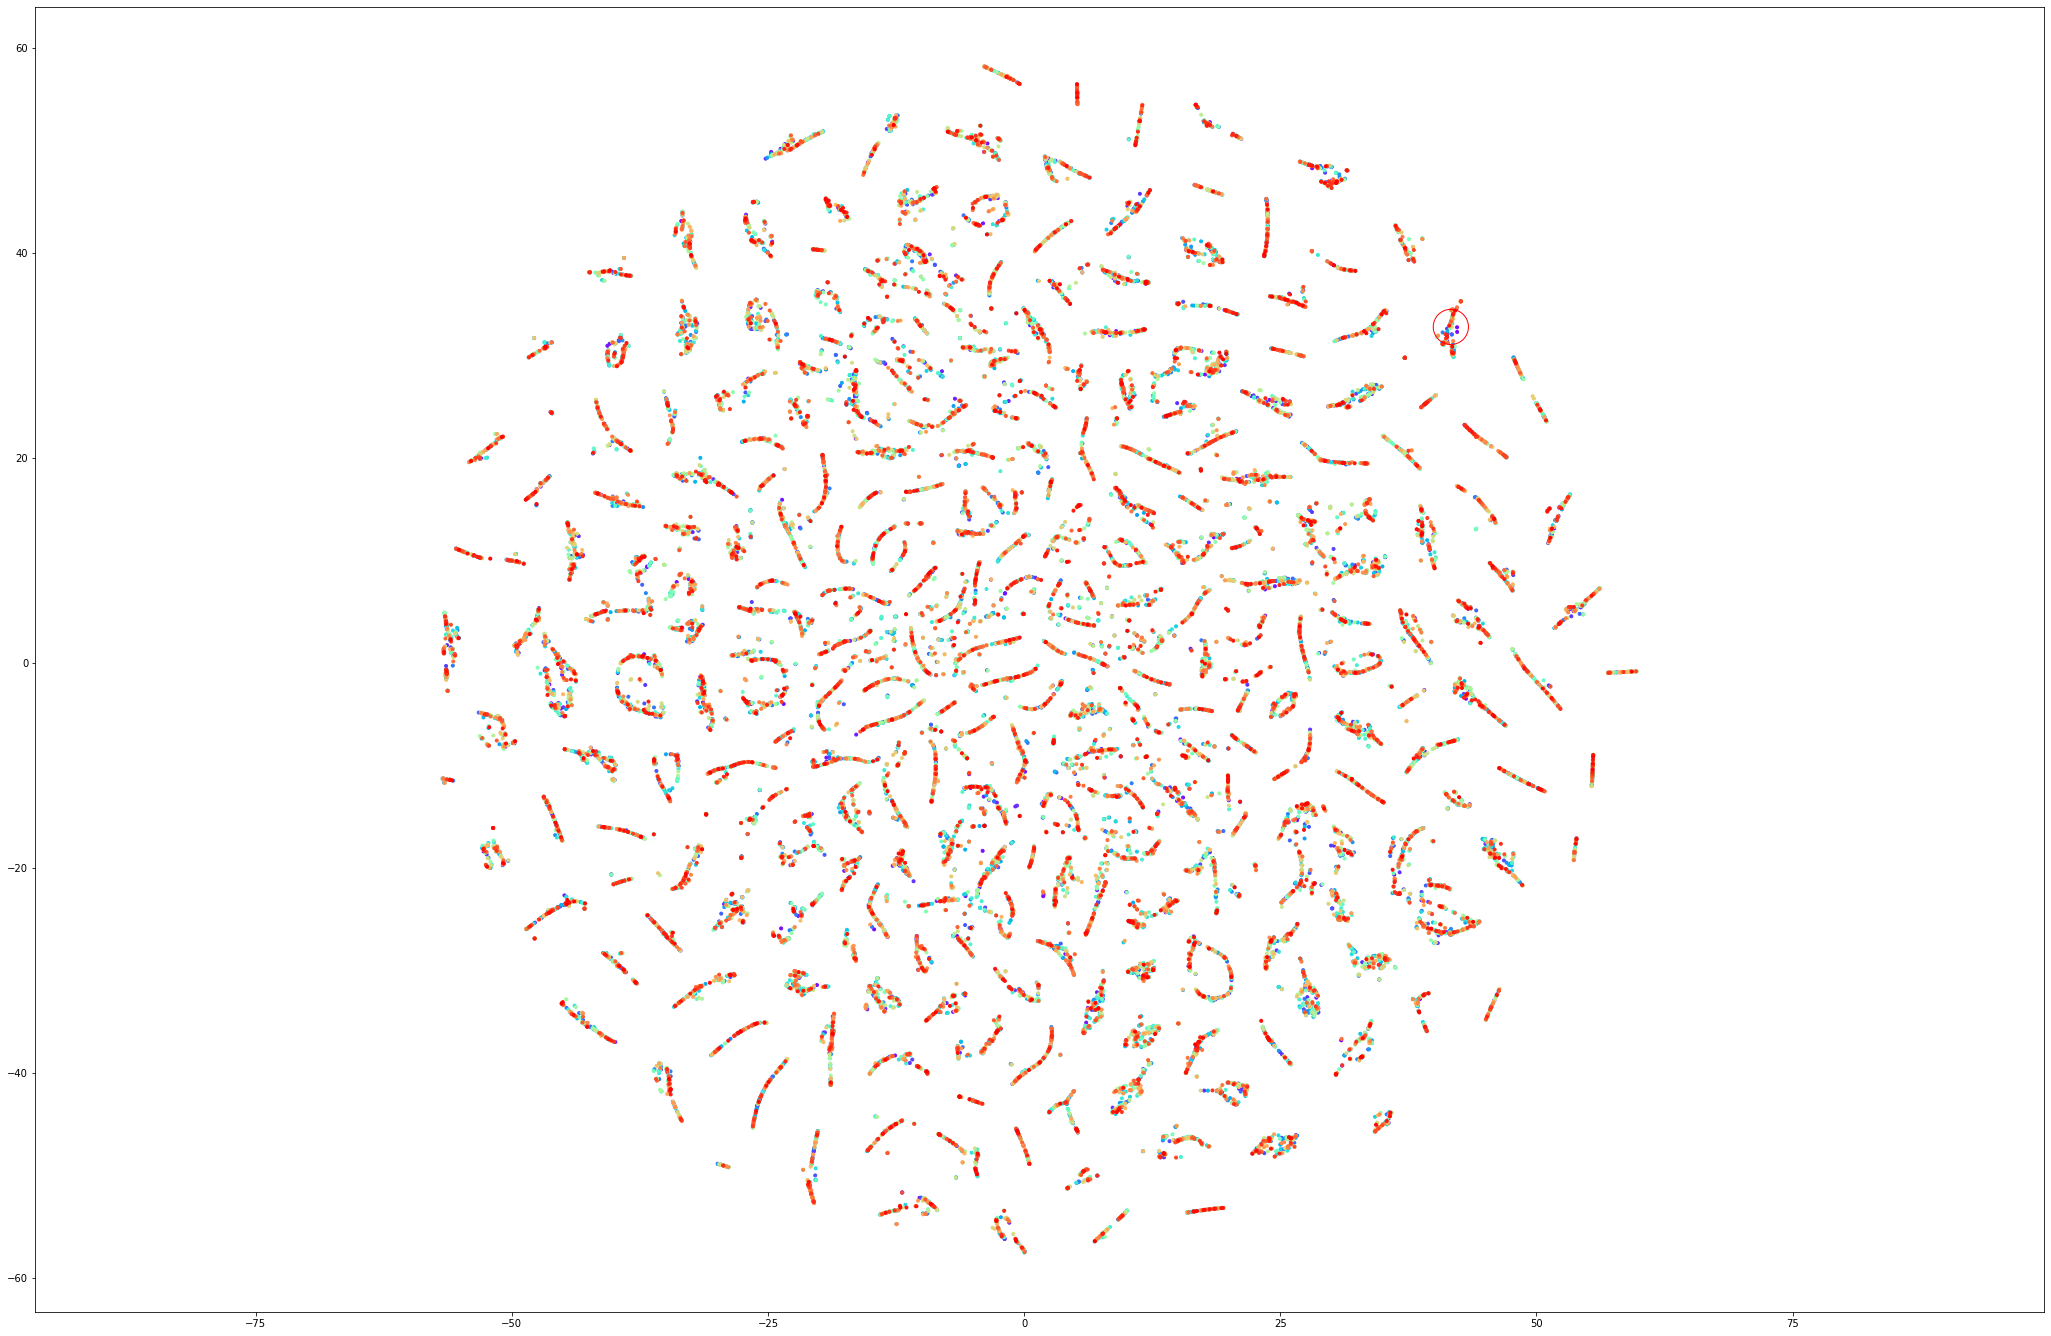

In [50]:
equivalent_points = np.array(embeddings)[test_embedding_indexs]
center =equivalent_points.mean(axis=0)

vis_x = embeddings[:, 0]
vis_y = embeddings[:, 1]

fig = plt.figure(figsize=(36,24))
ax = fig.add_subplot(111)
ax.scatter(vis_x, vis_y, color=colors, marker='.')
cir = plt.Circle(center, width, color='r',fill=False)
ax.set_aspect('equal', adjustable='datalim')
ax.add_patch(cir)
plt.savefig('./embeddings/tsne_no_strand_codebert_traces.pdf', bbox_inches='tight', dpi=300, format='pdf')
# plt.colorbar(ticks=range(10))
# plt.clim(-0.5, 9.5)
plt.show()

In [51]:
train_emb_gcb= np.array(train_emb_gcb)

tt=np.stack([i.cpu().detach().numpy() for i in train_emb_gcb], axis=0)
colors = cm.rainbow(np.linspace(0, 1, len(tt)))
embeddings_gcb = TSNE(n_jobs=16).fit_transform(tt)

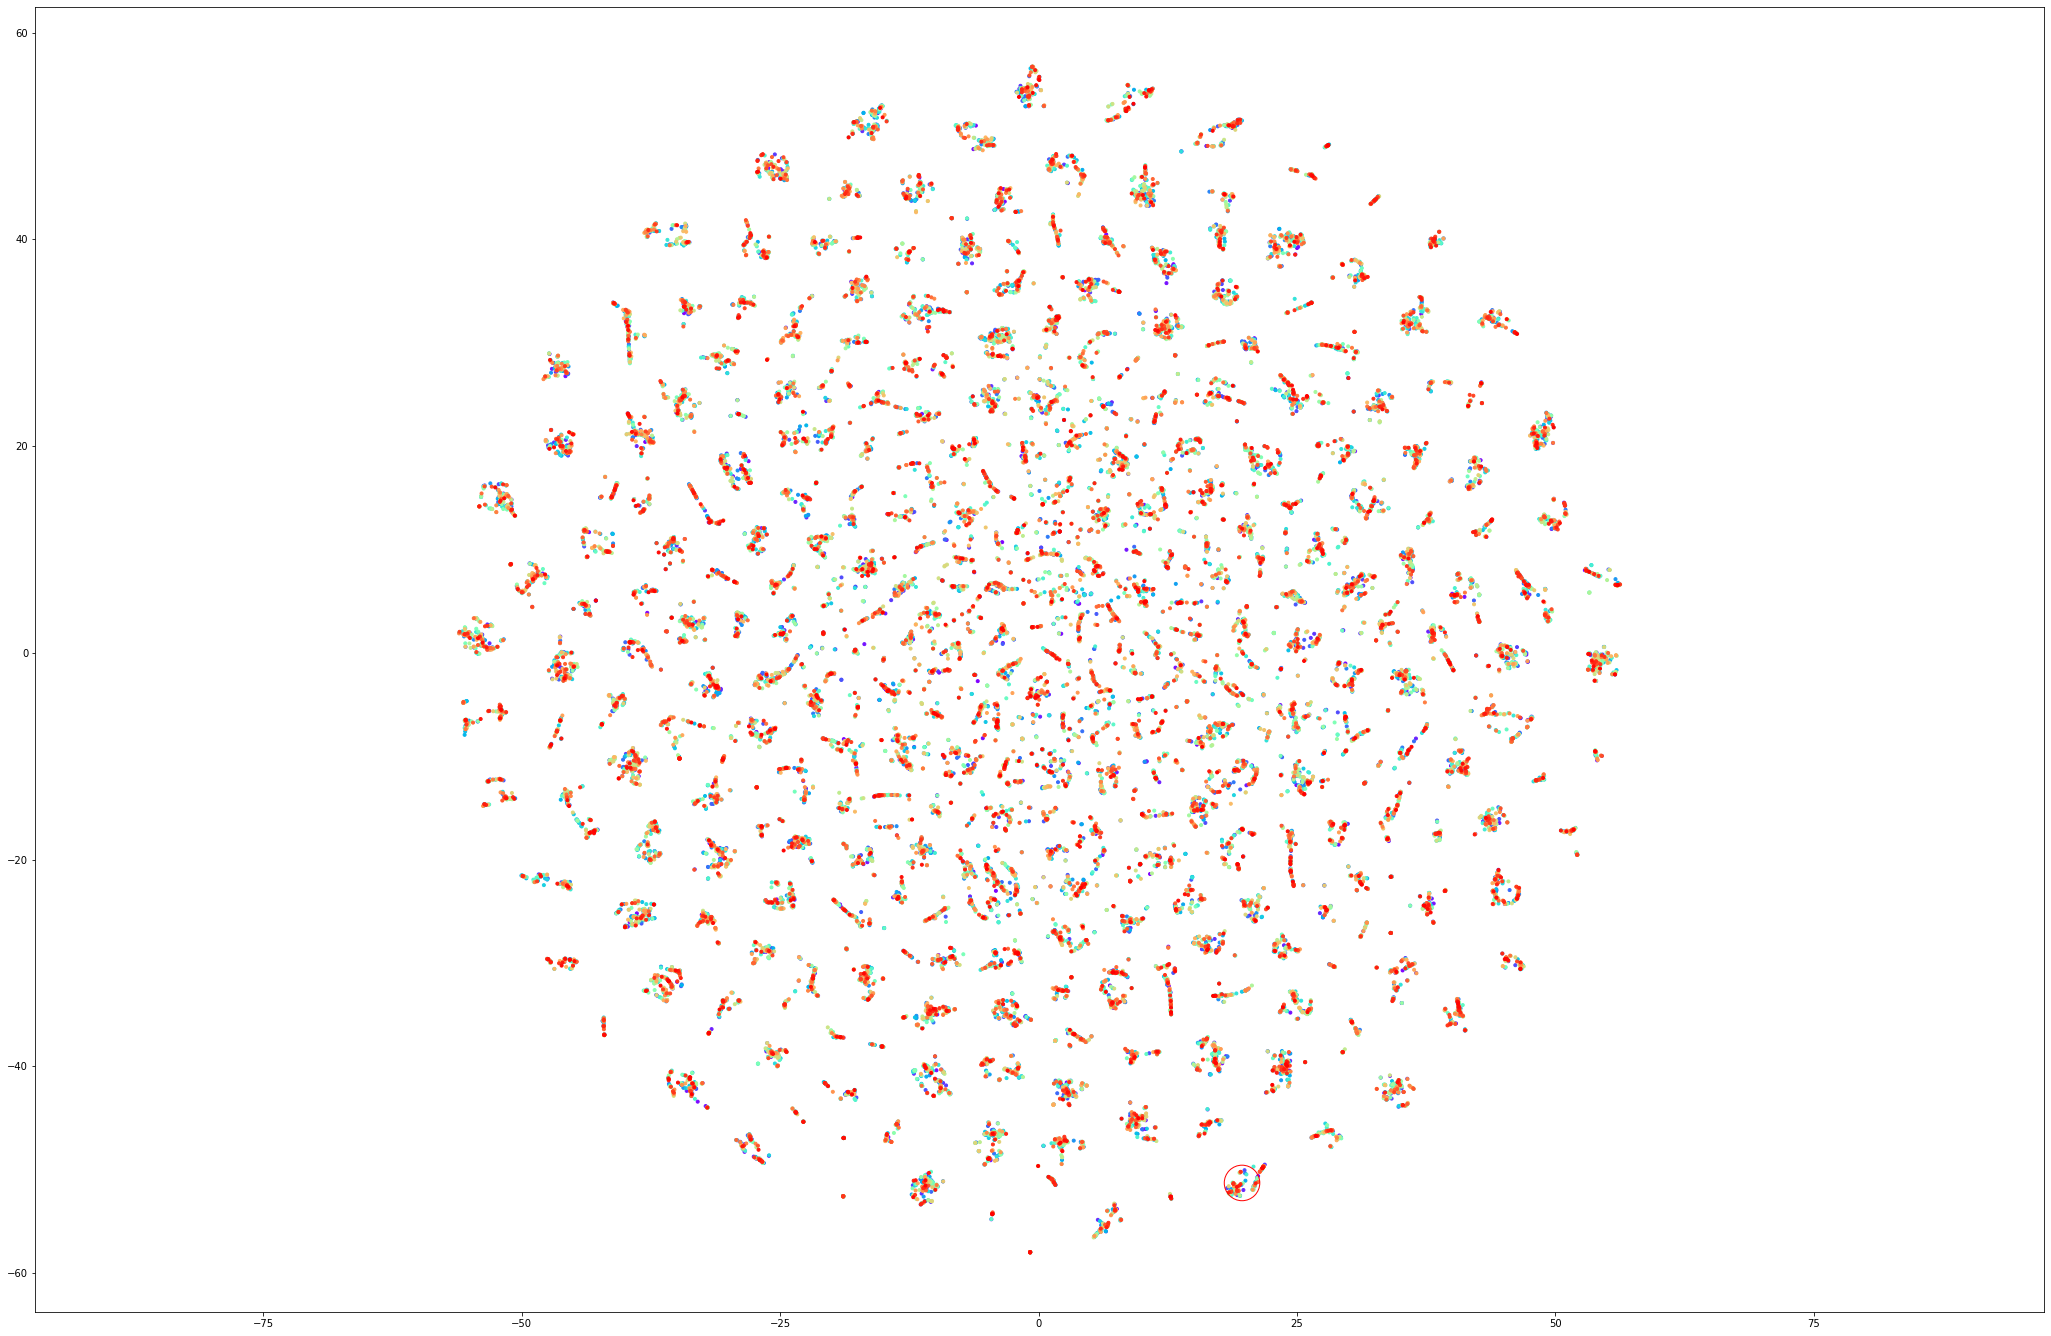

In [52]:

equivalent_points = np.array(embeddings_gcb)[test_embedding_indexs]
center =equivalent_points.mean(axis=0)
vis_x_gcb = embeddings_gcb[:, 0]
vis_y_gcb = embeddings_gcb[:, 1]

fig = plt.figure(figsize=(36,24))
ax = fig.add_subplot(111)
ax.scatter(vis_x_gcb, vis_y_gcb, color=colors, marker='.')
cir = plt.Circle(center, width, color='r',fill=False)
ax.set_aspect('equal', adjustable='datalim')
ax.add_patch(cir)
plt.savefig('./embeddings/tsne_no_strand_graphcodebert.pdf', bbox_inches='tight', dpi=300, format='pdf')
# plt.colorbar(ticks=range(10))
# plt.clim(-0.5, 9.5)
plt.show()

In [53]:
#intuition is that the code is sufficient to figure out how to characterize the output. trace doesnt tell us much. most traces are identical
pd.set_option('display.max_colwidth', None)
train.iloc[test_embedding_indexs][0:5]

31407                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             def find_Max_Len_Even(str): \r\n n = len(str) \r\n i = 0\r\n currlen = 0\r\n maxlen = 0\r\n st = -1\r\n while (i < n): \r\n if (str[i] == ' '): \r\n if (currlen % 2 == 0): \r\n if (maxlen < currlen): \r\n maxlen = currlen \r\n st = i - currlen \r\n currlen = 0 \r\n else : \r\n currlen += 1\r\n i += 1\r\n if (currlen % 2 == 0): \r\n if (maxl

In [76]:
#intuition is that the code is sufficient to figure out how to characterize the output. trace doesnt tell us much. most traces are identical
pd.set_option('display.max_colwidth', None)
train.iloc[test_embedding_indexs][0:10]

# Its now octal to decimal!!!!! octal_To_Decimal decimal_to_Octal

1516                                                                                                                                                                               def octal_To_Decimal(n): \r\n num = n; \r\n dec_value = 0; \r\n base = 1; \r\n temp = num; \r\n while (temp): \r\n last_digit = temp % 10; \r\n temp = int(temp / 10); \r\n dec_value += last_digit*base; \r\n base = base * 8; \r\n return dec_value; </s>octal_To_Decimal(99)</s>81</s>`n = 99,def octal_To_Decimal(n):,num = n;,`num = 99,dec_value = 0;,`dec_value = 0,base = 1;,`base = 1,temp = num;,`temp = 99,while (temp):,last_digit = temp % 10;,`last_digit = 9,temp = int(temp / 10);,`temp = 9,dec_value += last_digit*base;,`dec_value = 9,base = base * 8;,`base = 8,while (temp):,last_digit = temp % 10;,temp = int(temp / 10);,`temp = 0,dec_value += last_digit*base;,`dec_value = 81,base = base * 8;,`base = 64,while (temp):,return dec_value;,`81
12956    def octal_To_Decimal(n): \r\n num = n; \r\n dec_value = 0; \r\n ba

In [77]:
print(train.iloc[test_embedding_indexs].values[0].split("</s>")[0])
from pprint import pprint
trace_print = [train.iloc[test_embedding_indexs].values[i].split("</s>")[-1] for i in range(0, len(train.iloc[test_embedding_indexs]))][:50]
print("")
for each in trace_print:
    print(each, end='\n\n')

def octal_To_Decimal(n): 
 num = n; 
 dec_value = 0; 
 base = 1; 
 temp = num; 
 while (temp): 
 last_digit = temp % 10; 
 temp = int(temp / 10); 
 dec_value += last_digit*base; 
 base = base * 8; 
 return dec_value; 

`n = 99,def octal_To_Decimal(n):,num = n;,`num = 99,dec_value = 0;,`dec_value = 0,base = 1;,`base = 1,temp = num;,`temp = 99,while (temp):,last_digit = temp % 10;,`last_digit = 9,temp = int(temp / 10);,`temp = 9,dec_value += last_digit*base;,`dec_value = 9,base = base * 8;,`base = 8,while (temp):,last_digit = temp % 10;,temp = int(temp / 10);,`temp = 0,dec_value += last_digit*base;,`dec_value = 81,base = base * 8;,`base = 64,while (temp):,return dec_value;,`81

`n = 224,def octal_To_Decimal(n):,num = n;,`num = 224,dec_value = 0;,`dec_value = 0,base = 1;,`base = 1,temp = num;,`temp = 224,while (temp):,last_digit = temp % 10;,`last_digit = 4,temp = int(temp / 10);,`temp = 22,dec_value += last_digit*base;,`dec_value = 4,base = base * 8;,`base = 8,while (temp):,last_digit = 

# Now lets start with a trace cluster and see how the other models compare

In [87]:
point_of_interest = [ 2.28134652, -3.82793382]
def find_idx(e):
    return np.linalg.norm(point_of_interest-e)

def get_idx(e):
    return np.argsort(np.linalg.norm(point_of_interest-e, axis=1))

# test_idx = get_idx(embeddings)

points = 50
test_embeddings = sorted(embeddings, key=find_idx)
test_points = np.array(test_embeddings)
center = test_points[0:points].mean(axis=0)
width = np.linalg.norm(point_of_interest-test_points[0:points][-1], axis=-1)
test_embedding_indexs = get_idx(np.array(embeddings))[:points]

In [88]:
# train_emb= np.array(train_emb)
# tt=np.stack([i.cpu().detach().numpy() for i in train_emb], axis=0)
# colors = cm.rainbow(np.linspace(0, 1, len(tt)))
# embeddings = TSNE(n_jobs=16).fit_transform(tt)

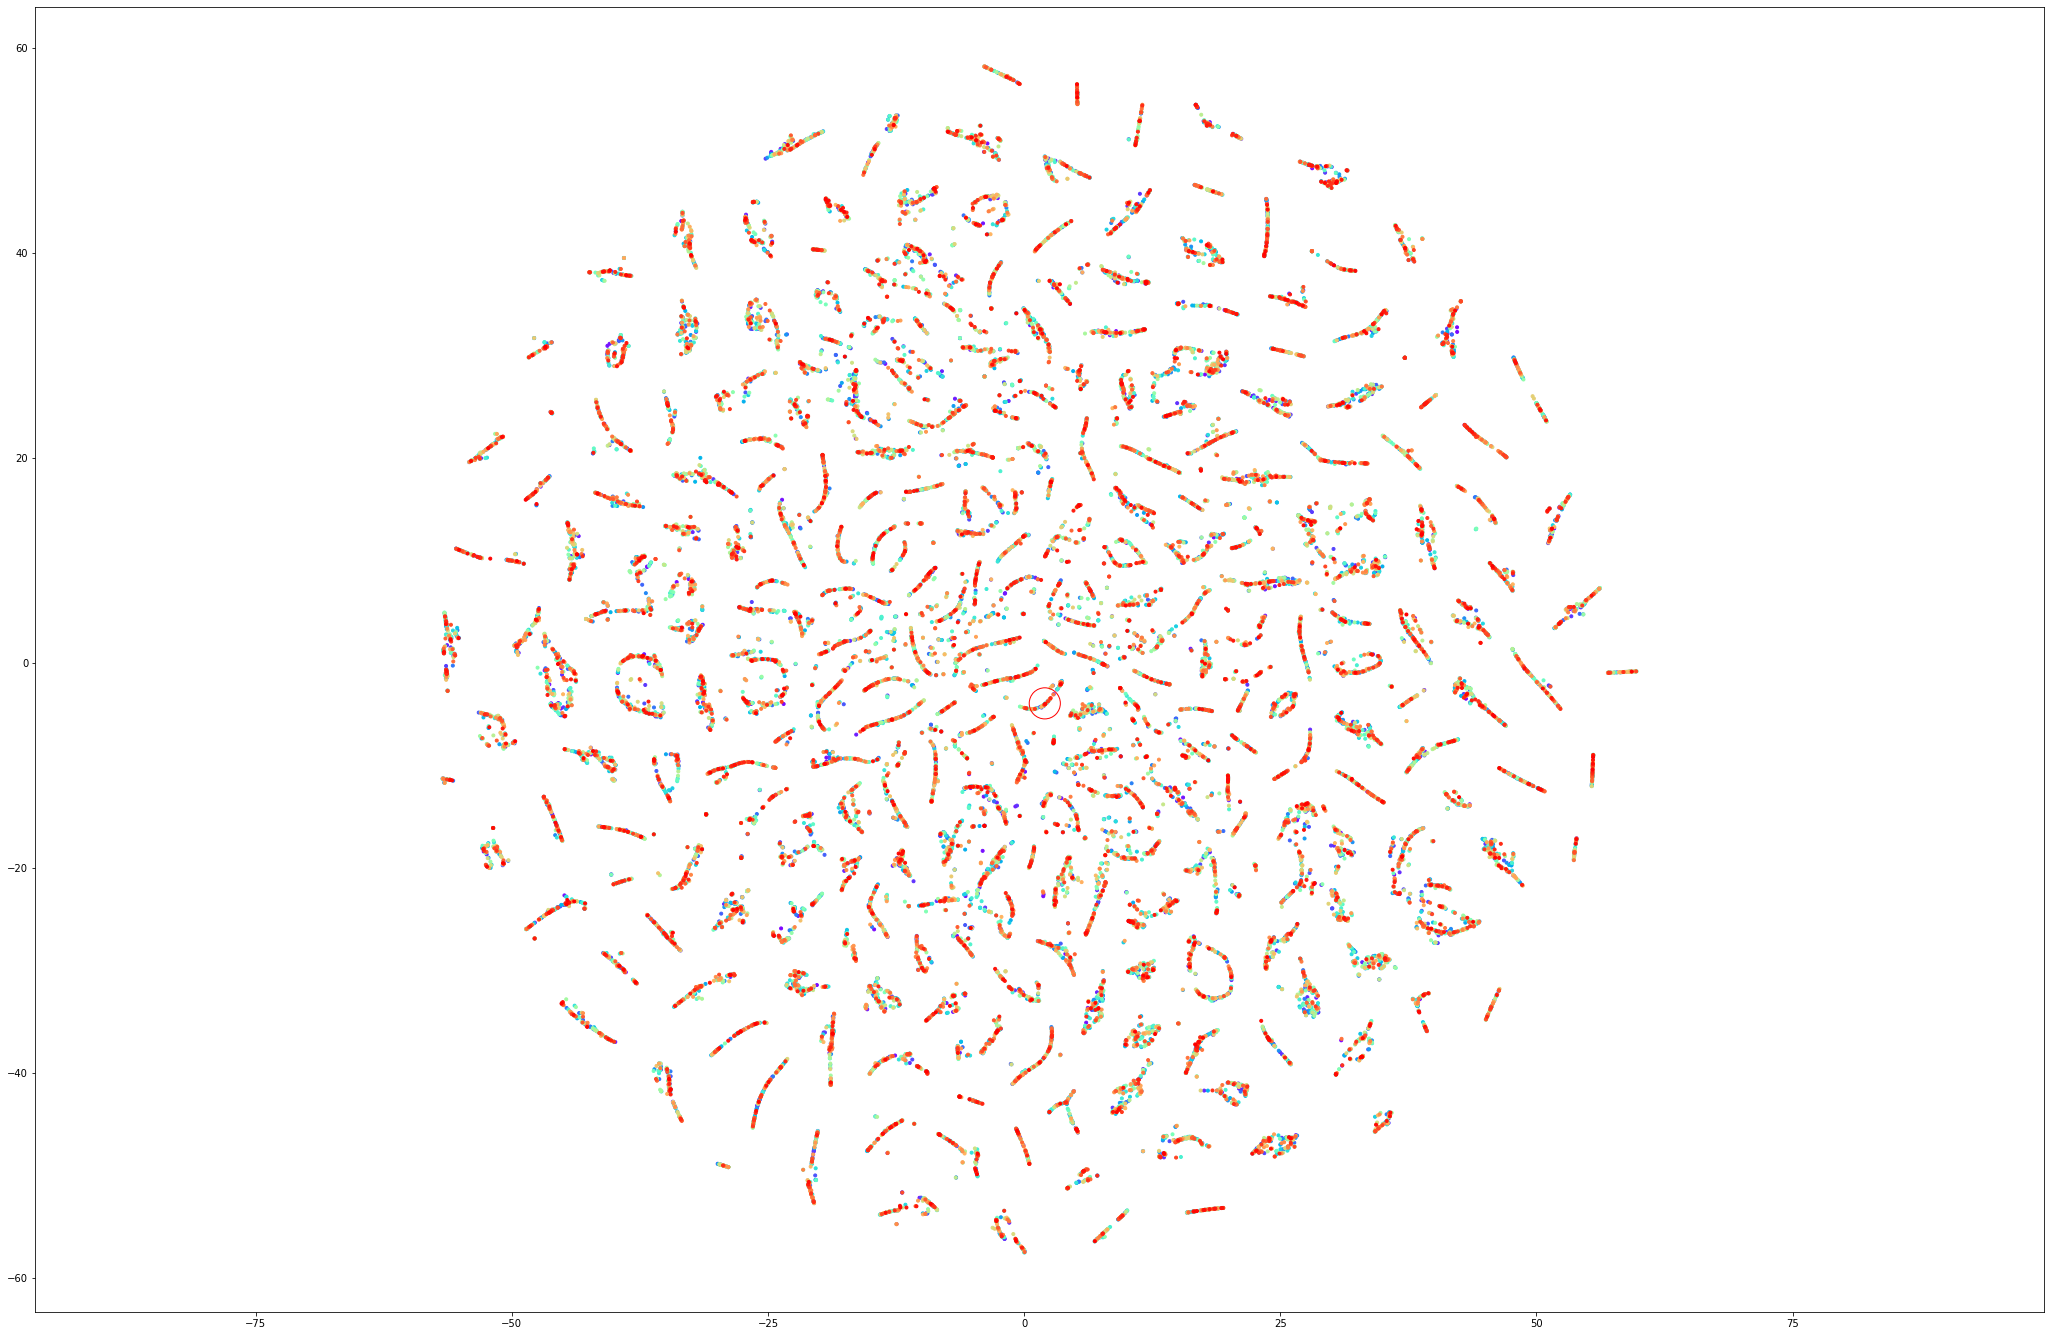

In [89]:
equivalent_points = np.array(embeddings)[test_embedding_indexs]
center =equivalent_points.mean(axis=0)

vis_x = embeddings[:, 0]
vis_y = embeddings[:, 1]

fig = plt.figure(figsize=(36,24))
ax = fig.add_subplot(111)
ax.scatter(vis_x, vis_y, color=colors, marker='.')
cir = plt.Circle(center, width, color='r',fill=False)
ax.set_aspect('equal', adjustable='datalim')
ax.add_patch(cir)
plt.savefig('./embeddings/tsne_strand2_codebert_traces.pdf', bbox_inches='tight', dpi=300, format='pdf')
# plt.colorbar(ticks=range(10))
# plt.clim(-0.5, 9.5)
plt.show()

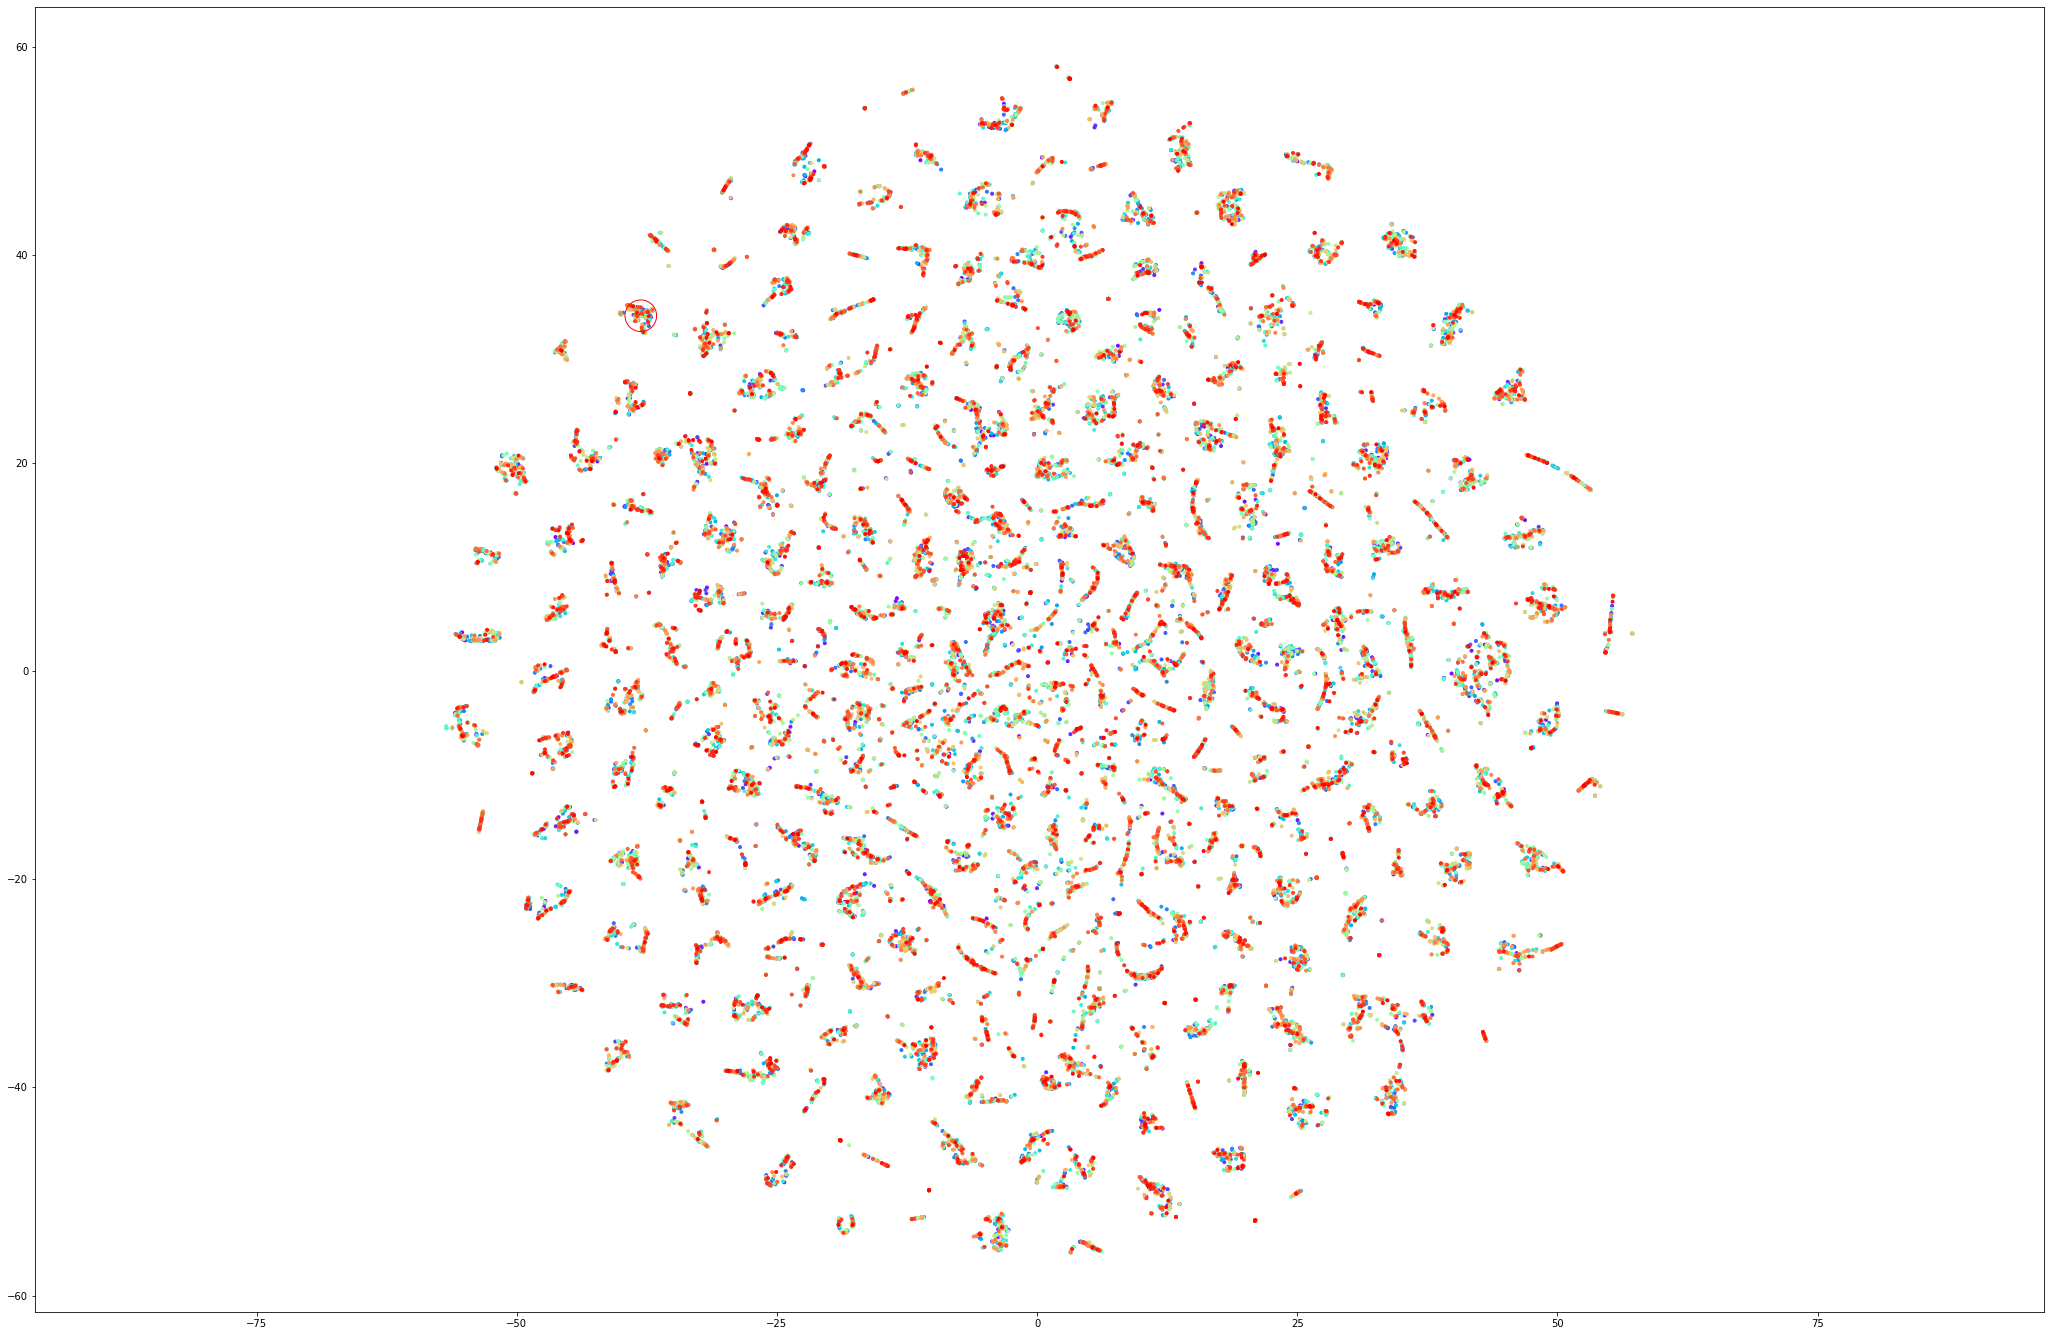

In [90]:
equivalent_points = np.array(embeddings_cb)[test_embedding_indexs]
center =equivalent_points.mean(axis=0)


vis_x_cb = embeddings_cb[:, 0]
vis_y_cb = embeddings_cb[:, 1]

fig = plt.figure(figsize=(36,24))
ax = fig.add_subplot(111)
ax.scatter(vis_x_cb, vis_y_cb, color=colors, marker='.')
cir = plt.Circle(center, width, color='r',fill=False)
ax.set_aspect('equal', adjustable='datalim')
ax.add_patch(cir)
plt.savefig('./embeddings/tsne_strand2_codebert.pdf', bbox_inches='tight', dpi=300, format='pdf')
# plt.colorbar(ticks=range(10))
# plt.clim(-0.5, 9.5)
plt.show()

In [82]:
# train_emb_gcb= np.array(train_emb_gcb)
# tt=np.stack([i.cpu().detach().numpy() for i in train_emb_gcb], axis=0)
# colors = cm.rainbow(np.linspace(0, 1, len(tt)))
# embeddings_gcb = TSNE(n_jobs=16).fit_transform(tt)

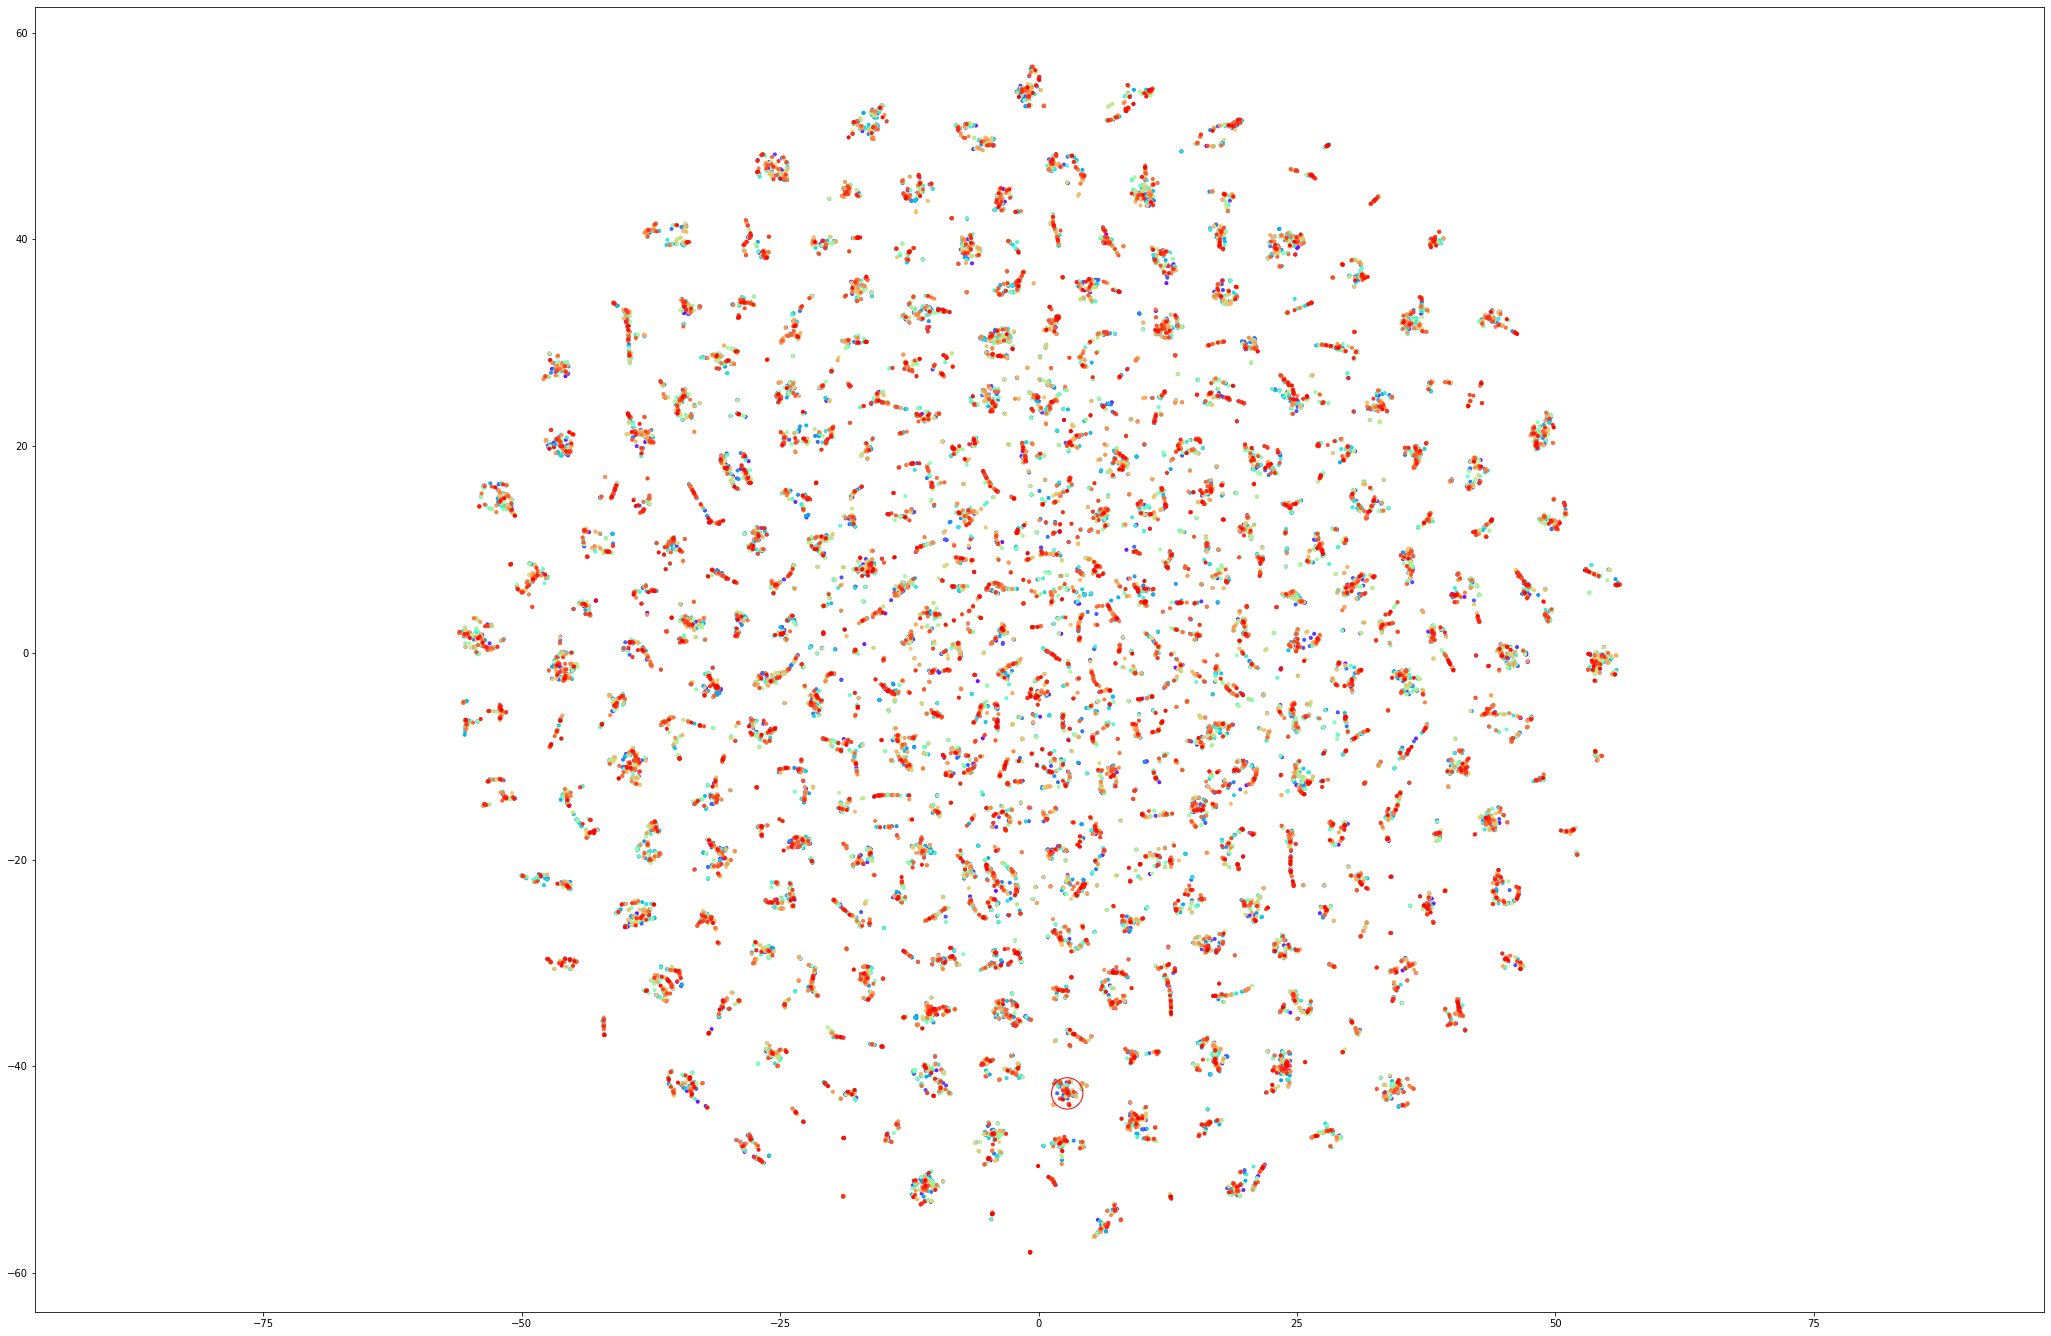

In [91]:
equivalent_points = np.array(embeddings_gcb)[test_embedding_indexs]
center =equivalent_points.mean(axis=0)

vis_x_gcb = embeddings_gcb[:, 0]
vis_y_gcb = embeddings_gcb[:, 1]

fig = plt.figure(figsize=(36,24))
ax = fig.add_subplot(111)
ax.scatter(vis_x_gcb, vis_y_gcb, color=colors, marker='.')
cir = plt.Circle(center, width, color='r',fill=False)
ax.set_aspect('equal', adjustable='datalim')
ax.add_patch(cir)
plt.savefig('./embeddings/tsne_strand2_graphcodebert.pdf', bbox_inches='tight', dpi=300, format='pdf')
# plt.colorbar(ticks=range(10))
# plt.clim(-0.5, 9.5)
plt.show()

In [92]:
#intuition is that the code is sufficient to figure out how to characterize the output. trace doesnt tell us much. most traces are identical
pd.set_option('display.max_colwidth', None)
train.iloc[test_embedding_indexs][0:5]

413      def decimal_to_Octal(deciNum):\r\n octalNum = 0\r\n countval = 1;\r\n dNo = deciNum;\r\n while (deciNum!= 0):\r\n remainder= deciNum % 8;\r\n octalNum+= remainder*countval;\r\n countval= countval*10;\r\n deciNum //= 8; \r\n return (octalNum)</s>decimal_to_Octal(112)</s>160</s>`deciNum = 112,def decimal_to_Octal(deciNum):,octalNum = 0,countval = 1;,`countval = 1,dNo = deciNum;,`dNo = 112,while (deciNum!= 0):,remainder= deciNum % 8;,`remainder = 0,octalNum+= remainder*countval;,countval= countval*10;,`countval = 10,deciNum //= 8;,`deciNum = 14,while (deciNum!= 0):,remainder= deciNum % 8;,`remainder = 6,octalNum+= remainder*countval;,`octalNum = 60,countval= countval*10;,`countval = 100,deciNum //= 8;,`deciNum = 1,while (deciNum!= 0):,remainder= deciNum % 8;,`remainder = 1,octalNum+= remainder*countval;,`octalNum = 160,countval= countval*10;,`countval = 1000,deciNum //= 8;,`deciNum = 0,while (deciNum!= 0):,return (octalNum),`160
9625                                               

In [93]:
print(train.iloc[test_embedding_indexs].values[0].split("</s>")[0])
from pprint import pprint
trace_print = [train.iloc[test_embedding_indexs].values[i].split("</s>")[-1] for i in range(0, len(train.iloc[test_embedding_indexs]))][:100]
print("")
for each in trace_print:
    print(each, end='\n\n')

def decimal_to_Octal(deciNum):
 octalNum = 0
 countval = 1;
 dNo = deciNum;
 while (deciNum!= 0):
 remainder= deciNum % 8;
 octalNum+= remainder*countval;
 countval= countval*10;
 deciNum //= 8; 
 return (octalNum)

`deciNum = 112,def decimal_to_Octal(deciNum):,octalNum = 0,countval = 1;,`countval = 1,dNo = deciNum;,`dNo = 112,while (deciNum!= 0):,remainder= deciNum % 8;,`remainder = 0,octalNum+= remainder*countval;,countval= countval*10;,`countval = 10,deciNum //= 8;,`deciNum = 14,while (deciNum!= 0):,remainder= deciNum % 8;,`remainder = 6,octalNum+= remainder*countval;,`octalNum = 60,countval= countval*10;,`countval = 100,deciNum //= 8;,`deciNum = 1,while (deciNum!= 0):,remainder= deciNum % 8;,`remainder = 1,octalNum+= remainder*countval;,`octalNum = 160,countval= countval*10;,`countval = 1000,deciNum //= 8;,`deciNum = 0,while (deciNum!= 0):,return (octalNum),`160

`deciNum = 18,def decimal_to_Octal(deciNum):,octalNum = 0,countval = 1;,`countval = 1,dNo = deciNum;,`dNo = 18,while (de